# Gym Ticket to Ride + RL

### OpenAI Gym Resources
- https://www.youtube.com/watch?v=ZxXKISVkH6Y
- https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e
- https://towardsdatascience.com/beginners-guide-to-custom-environments-in-openai-s-gym-989371673952
- https://medium.com/applied-data-science/how-to-train-ai-agents-to-play-multiplayer-games-using-self-play-deep-reinforcement-learning-247d0b440717

### Example with battleship
- https://github.com/thomashirtz/gym-battleship/blob/main/gym_battleship/environments/battleship.py
- https://github.com/thomashirtz/gym-battleship

### Ticket to Ride resources
- rules: https://www.ultraboardgames.com/ticket-to-ride/game-rules.php
- game board: https://i.pinimg.com/originals/fd/25/28/fd252885def1fdcd725ab08dadbb8c07.jpg
- destination points: https://ticket-to-ride.fandom.com/wiki/List_of_Ticket_to_Ride_Destination_Tickets
- card/material quantities: https://boardgamegeek.com/wiki/page/Ticket_to_Ride_series

### Other Ticket to Ride projects
- https://github.com/maxschorer/ticket_to_ride
- https://github.com/maxschorer/ticket_to_ride/blob/master/constants.py
- https://github.com/CodeProgress/TicketToRide/blob/master/TTRCards.py
- https://github.com/mcandocia/tickets_ai

### Part 1: Rendering the game board graphics

To start out with, gonna try to:
- display the game board
- fill in a rotated rectangle with train car
- plot all the routes
- plot all cities
- record colors and number of cars for each route

Also only going to do it as a 2-player game for now (no double routes)

Using webplotdigitizer to help with coordinates:
https://automeris.io/WebPlotDigitizer/

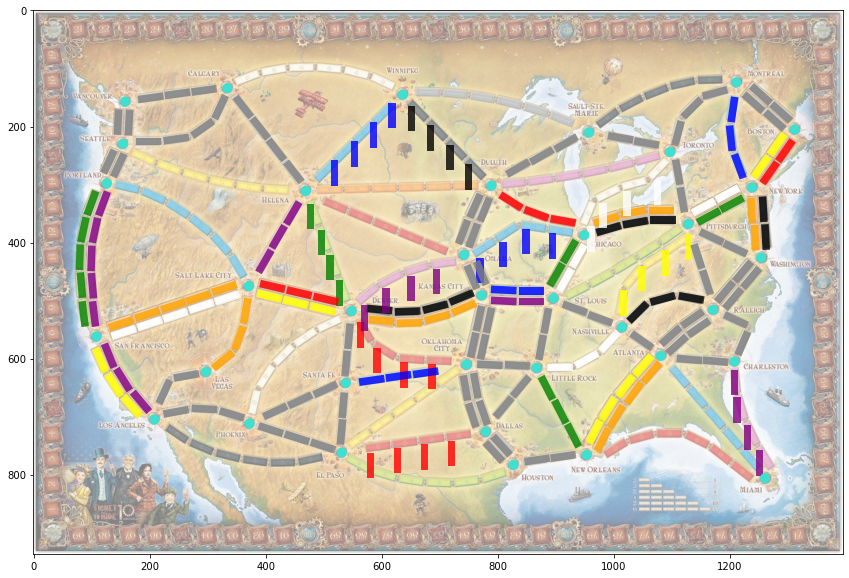

In [105]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

cities_list = {
    "atlanta": (1081,595),
    "boston": (1312,205),
    "calgary": (334,134),
    "charleston": (1208,605),
    "chicago": (949,387),
    "dallas": (779,726),
    "denver": (548,518),
    "duluth": (789,302),
    "el paso": (531,762),
    "helena": (469,311),
    "houston": (827,783),
    "kansas city": (772,491),
    "las vegas": (297,623),
    "little rock": (867,616),
    "los angeles": (208,705),
    "miami": (1261,806),
    "montreal": (1211,124),
    "nashville": (1014,546),
    "new orleans": (953,766),
    "new york": (1238,305),
    "oklahoma city": (746,610),
    "omaha": (742,421),
    "phoenix": (372,712),
    "pittsburgh": (1128,368),
    "portland": (126,298),
    "raleigh": (1171,516),
    "salt lake city": (371,475),
    "san francisco": (108,562),
    "santa fe": (538,642),
    "sault ste. marie": (957,210),
    "seattle": (154,230),
    "st. louis": (896,496),
    "toronto": (1097,244),
    "vancouver": (158,157),
    "washington": (1254,426),
    "winnipeg": (636,145),
}

x = 0
routes_list = {
    "atlanta-charleston":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1108,606,-85),(1153,609,-85)]
          },
    },
#     "atlanta-miami": [5,"blue"],    
    "atlanta-nashville":{
        1:{"color": "gray",
                  "length": 1,
                  "coordinates": [(1027,562,-55)]
          },
    },
    "atlanta-new orleans":{
        1:{"color": "yellow",
                  "length": 4,
                  "coordinates": [(1060,591,40),(1028,626,35),(996,665,31),(971,704,26)]
          },
        2:{"color": "orange",
                  "length": 4,
                  "coordinates": [(1074,603,40),(1042,638,35),(1010,678,31),(985,717,26)]
          },
    }, 
    "atlanta-raleigh":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1110,541,48),(1150,513,55)]
          },
        2:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1121,557,48),(1161,529,55)]
          },
    },
    "boston-montreal":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1220,149,-48),(1257,180,-48)]
          },
        2:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1233,135,-48),(1268,166,-48)]
          },
    },
    "boston-new york":{
        1:{"color": "yellow",
                  "length": 2,
                  "coordinates": [(1289,209,35),(1261,248,35)]
          },
        2:{"color": "red",
                  "length": 2,
                  "coordinates": [(1303,220,35),(1276,258,35)]
          },
    },    
    "calgary-helena":{
        1:{"color": "gray",
                  "length": 4,
                  "coordinates": [(343,153,-38),(372,190,-38),(400,227,-38),(430,265,-38)]
          },
    },
        
    "calgary-seattle":{
        1:{"color": "gray",
                  "length": 4,
                  "coordinates": [(176,232,-90),(225,231,-98),(277,221,-125),(318,189,-155)]
          },
    },
        
    "calgary-vancouver":{
        1:{"color": "gray",
                  "length": 3,
                  "coordinates": [(181,160,-98),(227,153,-98),(273,147,-98)]
          },
    }, 
#     "calgary-winnipeg": [6,"white"],        
    "charleston-miami":{
        1:{"color": "purple",
                  "length": 4,
                  "coordinates": [(1202,619,x),(1206,667,x),(1224,714,x),(1245,758,x)]
          },
    },
        
    "charleston-raleigh":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1188,530,-65),(1225,551,23)]
          },
    },
    "chicago-duluth":{
        1:{"color": "red",
                  "length": 3,
                  "coordinates": [(801,323,-58),(844,349,-70),(890,365,-80)]
          },
    }, 
    "chicago-omaha":{
        1:{"color": "blue",
                  "length": 4,
                  "coordinates": [(763,426,x),(803,399,x),(842,376,x),(888,384,x)]
          },
    },
        
    "chicago-pittsburgh":{
        1:{"color": "orange",
                  "length": 3,
                  "coordinates": [(968,373,-106),(1013,358,-100),(1060,351,-90)]
          },
        2:{"color": "black",
                  "length": 3,
                  "coordinates": [(972,389,-106),(1017,376,-100),(1063,368,-90)]
          },
    },    
    "chicago-st. louis":{
        1:{"color": "green",
                  "length": 2,
                  "coordinates": [(929,393,30),(906,433,30)]
          },
        2:{"color": "white",
                  "length": 2,
                  "coordinates": [(944,401,30),(922,443,30)]
          },
    },
    "chicago-toronto":{
        1:{"color": "white",
                  "length": 4,
                  "coordinates": [(954,372,x),(975,331,x),(1016,311,x),(1069,292,x)]
          },
    },
        
    "dallas-el paso":{
        1:{"color": "red",
                  "length": 4,
                  "coordinates": [(574,762,x),(621,754,x),(667,748,x),(714,742,x)]
          },
    },
        
    "dallas-houston":{
        1:{"color": "gray",
                  "length": 1,
                  "coordinates": [(774,749,-42)]
          },
        2:{"color": "gray",
                  "length": 1,
                  "coordinates": [(787,738,-42)]
          }
    },
    "dallas-little rock":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(849,627,40),(819,663,40)]
          },
    },
    
    "dallas-oklahoma city":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(734,630,-10),(743,679,-18)]
          },
        2:{"color": "gray",
                  "length": 2,
                  "coordinates": [(752,626,-10),(762,675,-19)]
          },
    },
    "denver-helena":{
        1:{"color": "green",
                  "length": 4,
                  "coordinates": [(471,333,x),(490,378,x),(504,421,x),(521,465,x)]
          },
    },
    "denver-kansas city":{
        1:{"color": "black",
                  "length": 4,
                  "coordinates": [(574,520,-85),(623,526,-92),(673,523,-104),(720,509,-112)]
          },
        2:{"color": "orange",
                  "length": 4,
                  "coordinates": [(577,539,-85),(626,546,-92),(676,541,-104),(724,527,-112)]
          },
    }, 
    
    "denver-oklahoma city":{
        1:{"color": "red",
                  "length": 4,
                  "coordinates": [(557,537,x),(585,581,x),(632,606,x),(680,609,x)]
          },
    },
    "denver-omaha":{
        1:{"color": "purple",
                  "length": 4,
                  "coordinates": [(564,508,x),(601,478,x),(644,457,x),(688,445,x)]
          },
    },
#     "denver-phoenix": [5,"white"],
    "denver-salt lake city":{
        1:{"color": "red",
                  "length": 3,
                  "coordinates": [(389,477,-77),(435,488,-77),(481,499,-77)]
          },
        2:{"color": "yellow",
                  "length": 3,
                  "coordinates": [(384,494,-77),(429,505,-77),(476,516,-77)]
          },
    },   
    "denver-santa fe":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(539,539,5),(534,586,5)]
          },
    },
    
#     "duluth-helena": [6,"orange"],
    "duluth-omaha":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(764,314,24),(742,359,21)]
          },
        2:{"color": "gray",
                  "length": 2,
                  "coordinates": [(780,320,22),(759,365,20)]
          },
    },
    "duluth-sault ste. marie":{
        1:{"color": "gray",
                  "length": 3,
                  "coordinates": [(819,288,-120),(860,267,-120),(902,245,-120)]
          },
    }, 
    
#     "duluth-toronto": [6,"purple"],
    "duluth-winnipeg":{
        1:{"color": "black",
                  "length": 4,
                  "coordinates": [(645,164,x),(678,198,x),(711,231,x),(743,265,x)]
          },
    },
#     "el paso-houston": [6,"green"],
#     "el paso-los angeles": [6,"black"],
#     "el paso-oklahoma city": [5,"yellow"],
    "el paso-phoenix":{
        1:{"color": "gray",
                  "length": 3,
                  "coordinates": [(386,722,-72),(431,736,-72),(476,750,-72)]
          },
    }, 
    
    "el paso-santa fe":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(529,658,5),(526,704,5)]
          },
    },
    
#     "helena-omaha": [5,"red"],
    "helena-salt lake city":{
        1:{"color": "purple",
                  "length": 3,
                  "coordinates": [(452,327,30),(427,368,30),(404,410,30)]
          },
    }, 
    
#     "helena-seattle": [6,"yellow"],
    "helena-winnipeg":{
        1:{"color": "blue",
                  "length": 4,
                  "coordinates": [(611,159,x),(579,193,x),(547,225,x),(512,258,x)]
          }, 
    },
    "houston-new orleans":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(847,784,-98),(892,778,-98)]
          },
    },
    
    "kansas city-oklahoma city":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(766,508,12),(756,554,12)]
          },
        2:{"color": "gray",
                  "length": 2,
                  "coordinates": [(783,511,12),(773,557,12)]
          },
    },
    "kansas city-omaha":{
        1:{"color": "gray",
                  "length": 1,
                  "coordinates": [(741,442,-23)]
          },
        2:{"color": "gray",
                  "length": 1,
                  "coordinates": [(757,435,-23)]
          }
    },
    "kansas city-st. louis":{
        1:{"color": "blue",
                  "length": 2,
                  "coordinates": [(788,487,-87),(836,490,-90)]
          },
        2:{"color": "purple",
                  "length": 2,
                  "coordinates": [(788,506,-87),(836,508,-90)]
          },
    },
    "las vegas-los angeles":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(222,680,-155),(243,640,-100)]
          },
    },
    "las vegas-salt lake city":{
        1:{"color": "orange",
                  "length": 3,
                  "coordinates": [(363,495,10),(355,542,20),(339,584,50)]
          },
    }, 
    "little rock-nashville":{
        1:{"color": "white",
                  "length": 3,
                  "coordinates": [(886,622,-90),(938,618,-120),(983,591,-137)]
          },
    }, 
    
    "little rock-new orleans":{
        1:{"color": "green",
                  "length": 3,
                  "coordinates": [(869,634,-27),(892,675,-27),(914,716,-27)]
          },
    }, 
    
    "little rock-oklahoma city":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(764,616,-87),(812,617,-87)]
          },
    },
    
    "little rock-st. louis":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(881,512,10),(872,558,10)]
          },
    },
    "los angeles-phoenix":{
        1:{"color": "gray",
                  "length": 3,
                  "coordinates": [(225,702,-100),(272,692,-87),(319,696,-73)]
          },
    }, 
    "los angeles-san francisco":{
        1:{"color": "purple",
                  "length": 3,
                  "coordinates": [(116,577,-22),(137,621,-32),(166,662,-40)]
          },
        2:{"color": "yellow",
                  "length": 3,
                  "coordinates": [(101,585,-22),(122,631,-32),(150,670,-40)]
          },
    }, 
#     "miami-new orleans": [6,"red"],
    "montreal-new york":{
        1:{"color": "blue",
                  "length": 3,
                  "coordinates": [(1202,148,8),(1193,199,-6),(1202,250,-20)]
          },
    }, 
#     "montreal-sault ste. marie": [5,"black"],
    "montreal-toronto":{
        1:{"color": "gray",
                  "length": 3,
                  "coordinates": [(1194,130,75),(1146,148,45),(1110,189,15)]
          },
    }, 
    "nashville-pittsburgh":{
        1:{"color": "yellow",
                  "length": 4,
                  "coordinates": [(1122,386,x),(1083,413,x),(1042,440,x),(1010,482,x)]
          }, 
    },
    "nashville-raleigh":{
        1:{"color": "black",
                  "length": 3,
                  "coordinates": [(1031,540,-135),(1065,509,-105),(1111,498,-80)]
          },
    }, 
    
    "nashville-st. louis":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(910,512,-70),(954,530,-70)]
          },
    },
    
    "new york-pittsburgh":{
        1:{"color": "green",
                  "length": 2,
                  "coordinates": [(1220,317,62),(1180,339,62)]
          },
        2:{"color": "white",
                  "length": 2,
                  "coordinates": [(1212,300,62),(1171.25,323,62)]
          },
    },
    "new york-washington":{
        1:{"color": "orange",
                  "length": 2,
                  "coordinates": [(1230,323,-3),(1236,370,-3)]
          },
        2:{"color": "black",
                  "length": 2,
                  "coordinates": [(1250,321,-3),(1254,369,-3)]
          },
    },
    "oklahoma city-santa fe":{
        1:{"color": "blue",
                  "length": 3,
                  "coordinates": [(562,647,-98),(608,640,-98),(655,634,-98)]
          },
    }, 
    "phoenix-santa fe":{
        1:{"color": "gray",
                  "length": 3,
                  "coordinates": [(399,706,-115),(442,687,-115),(486,668,-115)]
          },
    }, 
    "pittsburgh-raleigh":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1132,405,-18),(1147,450,-18)]
          },
    },
    
#     "pittsburgh-st. louis": [5,"green"],
    "pittsburgh-toronto":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1100,258,-10),(1108,306,-10)]
          },
    },
    
    "pittsburgh-washington":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1146,387,-65),(1187,407,-65)]
          },
    },
    
#     "portland-salt lake city": [6,"blue"],
    
    "portland-san francisco":{
        1:{"color": "purple",
                  "length": 5,
                  "coordinates": [(121,310,20),(104,356,12),(94,405,2),(93,453,-5),(95,502,-7)]
          },
        2:{"color": "green",
                  "length": 5,
                  "coordinates": [(101,309,20),(84,355,12),(74,403,2),(74,452,-5),(77,502,-7)]
          },
    }, 
    "portland-seattle":{
        1:{"color": "gray",
                  "length": 1,
                  "coordinates": [(133,238,25)]
          },
        2:{"color": "gray",
                  "length": 1,
                  "coordinates": [(150,244,25)]
          }
    },
    "raleigh-washington":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1232,429,40),(1201,464,40)]
          },
        2:{"color": "gray",
                  "length": 2,
                  "coordinates": [(1246,440,40),(1215,476,40)]
          },
    },
    "salt lake city-san francisco":{
        1:{"color": "orange",
                  "length": 5,
                  "coordinates": [(132,553,-108),(177,537,-108),(222,522,-108),(265,508,-108),(310,492,-108)]
          },
        2:{"color": "white",
                  "length": 5,
                  "coordinates": [(137,568,-108),(182,553,-108),(226,539,-108),(271,523,-108),(316,509,-108)]
          },
    }, 
    "sault ste. marie-toronto":{
        1:{"color": "gray",
                  "length": 2,
                  "coordinates": [(989,222,-80),(1034,231,-80)]
          },
    },
    
#     "sault ste. marie-winnipeg": [6,"gray"],
    "seattle-vancouver":{
        1:{"color": "gray",
                  "length": 1,
                  "coordinates": [(140,170,3)]
          },
        2:{"color": "gray",
                  "length": 1,
                  "coordinates": [(159,171,3)]
          }
    },
}


train_car_point_values={1:1,2:2,3:4,4:7,5:10,6:15}

# 30 destination tickets
destination_tickets=[
    {'cities': ['boston', 'miami'], 'points': 12},
    {'cities': ['calgary', 'phoenix'], 'points': 13},
    {'cities': ['calgary', 'salt lake city'], 'points': 7},
    {'cities': ['chicago', 'new orleans'], 'points': 7},
    {'cities': ['chicago', 'santa fe'], 'points': 9},
    {'cities': ['dallas', 'new york'], 'points': 11},
    {'cities': ['denver', 'el paso'], 'points': 4},
    {'cities': ['denver', 'pittsburgh'], 'points': 11},
    {'cities': ['duluth', 'el paso'], 'points': 10},
    {'cities': ['duluth', 'houston'], 'points': 8},
    {'cities': ['helena', 'los angeles'], 'points': 8},
    {'cities': ['kansas city', 'houston'], 'points': 5},
    {'cities': ['los angeles', 'chicago'], 'points': 16},
    {'cities': ['los angeles', 'miami'], 'points': 20},
    {'cities': ['los angeles', 'new york'], 'points': 21},
    {'cities': ['montreal', 'atlanta'], 'points': 9},
    {'cities': ['montreal', 'new orleans'], 'points': 13},
    {'cities': ['new york', 'atlanta'], 'points': 6},
    {'cities': ['portland', 'nashville'], 'points': 17},
    {'cities': ['portland', 'phoenix'], 'points': 11},
    {'cities': ['san francisco', 'atlanta'], 'points': 17},
    {'cities': ['sault ste. marie', 'nashville'], 'points': 8},
    {'cities': ['seattle', 'los angeles'], 'points': 9},
    {'cities': ['seattle', 'new york'], 'points': 22},
    {'cities': ['sault ste. marie', 'oklahoma city'], 'points': 9},
    {'cities': ['toronto', 'miami'], 'points': 10},
    {'cities': ['vancouver', 'montreal'], 'points': 20},
    {'cities': ['vancouver', 'santa fe'], 'points': 13},
    {'cities': ['winnipeg', 'houston'], 'points': 12},
    {'cities': ['winnipeg', 'little rock'], 'points': 11},
]

# function to plot a city
def plot_city(cities_list, city_name):
    point_size = 8
    circle1 = plt.Circle((cities_list[city_name][0], cities_list[city_name][1]), point_size, color='turquoise', fill=True, zorder=10)
    plt.gca().add_patch(circle1)

# function to plot a train car
def plot_train_car(coordinates, color, filled=False, player_color = ""):
    
    x = coordinates[0]
    y = coordinates[1]
    angle = coordinates[2]

    train_width = 13
    train_height = 44
    
    if filled:
        plt.gca().add_patch(Rectangle((x,y),train_width,train_height,
                                  angle=angle,
                                  edgecolor='black',
                                  facecolor=player_color,
                                  lw=0.5));
    else:
        plt.gca().add_patch(Rectangle((x,y),train_width,train_height,
                                  angle=angle,
                                  edgecolor=color,
                                  facecolor=color,
                                      # for testing/making board
                                  alpha=0.8,  
                                  lw=0));
                                      #  for actual display:
#                                   alpha=0.4,                                
#                                   lw=2));

# function to plot a route
def plot_route(routes_list, cities_list, route_name,plot_type="trains", filled=False, player_color = ""):
    if plot_type == "lines":
        
        cities = route_name.split('-')
        city1 = cities_list[cities[0]]
        city2 = cities_list[cities[1]]
        
        if 2 in routes_list[route_name]:

            route_color1 = routes_list[route_name][1]["color"]
            route_color2 = routes_list[route_name][2]["color"]

            x_values = [city1[0]-5, city2[0]-5]
            y_values = [city1[1]-2, city2[1]-2]
            plt.plot(x_values, y_values, color=route_color1, lw=1)

            x_values = [city1[0]+5, city2[0]+5]
            y_values = [city1[1]+2, city2[1]+2]
            plt.plot(x_values, y_values, color=route_color2, lw=1)

        else:
            route_color = routes_list[route_name][1]["color"]

            x_values = [city1[0], city2[0]]
            y_values = [city1[1], city2[1]]
            plt.plot(x_values, y_values, color=route_color, lw=1)
            
    elif plot_type == "trains":
        
        for path in routes_list[route_name]:
            for i in range(len(routes_list[route_name][path]["coordinates"])):
                plot_train_car(routes_list[route_name][path]["coordinates"][i], routes_list[route_name][path]["color"],filled,player_color)


# display the image of the board! (usa edition of the game)
fig, ax = plt.subplots(figsize=(15,10))
plt.imshow(Image.open('ticket-to-ride.jpg'), alpha = 0.5)

# iterate through routes_list dictionary to plot all routes on board with lines
for route in routes_list:
    plot_route(routes_list,cities_list,route,plot_type = 'trains', filled = False)
#     plot_route(routes_list,cities_list,route,'lines')

# iterate through cities_list dictionary to plot all cities on board with circle
for city in cities_list:
    plot_city(cities_list,city)

# example of marking a claimed route as the black player
# plot_route(routes_list,cities_list,'dallas-houston',plot_type = 'trains', filled = True, player_color = 'black')


to do now:
- finish dict of train car coordinates for every route
    - remaining: 10 single 4 routes ROTATE 40 points
    
    
    later: 
    - 6 single 5 routes (30 points)
    - 9 single 6 routes (54 points)

then: 
- implement the rules as a gym environment
    - beginning of game/setup
    - turn actions
    - point scoring
    - end of game, longest route
    - summary of other pieces:
        - 45 train pieces for each player
        - 96 train cards (12 each in red, orange, yellow, green, blue, purple, black, white)
        - 14 locomotive (multicolored for the wild card/gray spaces)

functions to write?

- total points is made up of:
    - points based on trains (visible to public)
    - points based on players hand
    - points based on if player has the longest route
    
- initialize destination cards deck
- initialize shuffled train car cards deck
- initialize open deck
- initialize discard pile
- initialize player hand/state:
    - destination cards
        - completed
        - uncompleted
    - train cards
    - longest route
    - routes claimed
    - train car pieces
    
- draw cards function
    - draw train cards from open deck
    - draw train cards from shuffled deck
    - draw from destination cards
    - discard pile once train cards used
    - reshuffle and put cards back into deck

- route functions
    - check if destination cards complete function
        - search to check if destination card is satisfied by player's routes
    - longest route function
        - length of longest route using player's routes

- end of game functions
    - based on number of train car pieces
    - determine winner based on points